In [1]:
# import predict
from sentence_encoder import *

In [33]:
data_padded, label_scale, aspects = predict.prepare_data('../../data/iclr_2017')

#### (papers, paper obj, review, no.reviews, reviews, decision), aspects_score = data_padded_

In [34]:
x_train, y_train, x_dev, y_dev,x_test, y_test = data_padded

In [27]:
x_paper = x_train[0]
x_review = x_train[4]
# x_num_reviews = x_train[3]
x_decision = x_train[5]

In [28]:
d_paper = x_dev[0]
d_review = x_dev[4]
# d_num_reviews = x_dev[3]
d_decision = x_dev[5]

t_paper = x_test[0]
t_review = x_test[4]
# t_num_reviews = x_test[3]
t_decision = x_test[5]

In [29]:
# tp_acl = xtacl[0]
# tr_acl = xtacl[4]
# td_acl = xtacl[5]

# dp_acl = xdacl[0]
# dr_acl = xdacl[4]
# dd_acl = xdacl[5]

# cp_acl = tacl[0]
# cr_acl = tacl[4]
# cd_acl = tacl[5]

In [2]:
def get_data(data):
    papers, reviews, decision = data 
    reviews_embedded = embed(reviews)
    papers_embedded = embed(papers)
    sentiment_scores = sentiment(reviews)
    #papers_embedded = np.repeat(papers_embedded, num_reviews, axis = 0)
    decision = np.array(decision).astype(int)
    #decision = np.repeat(decision, num_reviews, axis = 0)
    return papers_embedded, reviews_embedded, sentiment_scores, decision

In [31]:
papers_train, reviews_train, sentiment_train, decision_train = get_data((x_paper, x_review, x_decision))

In [32]:
for i in (papers_train, reviews_train, sentiment_train, decision_train):
    print i.shape

In [33]:
papers_valid, reviews_valid, sentiment_valid, decision_valid = get_data((d_paper, d_review, d_decision))

In [34]:
for i in (papers_valid, reviews_valid, sentiment_valid, decision_valid):
    print i.shape


In [35]:
papers_train = np.pad(papers_train, [(0,0),(0, 1494-666), (0,0)], mode = 'constant', constant_values = 0.0)
                      

In [36]:
papers_valid = papers_valid[:,:1494,:]
reviews_valid = np.pad(reviews_valid, [(0,0),(0, 525-318), (0,0)], mode = 'constant', constant_values = 0.0)
sentiment_valid = np.pad(sentiment_valid, [(0,0),(0, 525-318), (0,0)], mode = 'constant', constant_values = 0.0)

In [37]:
for i in (papers_valid, reviews_valid, sentiment_valid, decision_valid):
    print i.shape

In [38]:
papers_test, reviews_test, sentiment_test, decision_test = get_data((t_paper, t_review, t_decision))

In [39]:
for i in (papers_test, reviews_test, sentiment_test, decision_test):
    print i.shape

In [40]:
papers_test = np.pad(papers_test, [(0,0),(0, 1494-419), (0,0)], mode = 'constant', constant_values = 0.0)
reviews_test = np.pad(reviews_test, [(0,0),(0, 525-309), (0,0)], mode = 'constant', constant_values = 0.0)
sentiment_test = np.pad(sentiment_test, [(0,0),(0, 525-309), (0,0)], mode = 'constant', constant_values = 0.0)

### iclr-2018 dataset

#### ICLR-2018
#### 573 Rejected 336 Accepted Papers, 909 Papers, 2741 Reviews

In [1]:
import predict1

INFO:tensorflow:Using /tmp/tfhub_modules to cache modules.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [2]:
data_padded_, label_scale_, aspects_ = predict1.prepare_data('../../data/iclr_2018')

#### (papers, paper obj, review, no.reviews, reviews, decision), aspects_score = data_padded_

In [15]:
decision = []
for paper in data_padded_[0][1]:
    decision.append(paper.__dict__['ACCEPTED'])
decision = np.array(decision).astype(int)    

In [3]:
train_, ytrain_ = data_padded_
papers_, _,_,_,reviews_,decision_ = train_

In [4]:
len(papers_)

909

In [9]:
paper_vec, review_vec, sentic_vec, dcsn_vec = get_data((papers_[:500], reviews_[:500], decision_[:500]))

In [10]:
for i in (paper_vec, review_vec, sentic_vec, dcsn_vec):
    print i.shape

In [11]:
paper_vec1, review_vec1, sentic_vec1, dcsn_vec1 = get_data((papers_[500:], reviews_[500:], decision_[500:]))

In [12]:
for i in (paper_vec1, review_vec1, sentic_vec1, dcsn_vec1):
    print i.shape

In [13]:
max_paper_sent = max(paper_vec1.shape[1], paper_vec.shape[1])
max_review_sent = max(review_vec1.shape[1], review_vec.shape[1])

In [14]:
paper_vec = np.pad(paper_vec, [(0,0),(0, max_paper_sent-paper_vec.shape[1]), (0,0)], mode = 'constant', constant_values = 0.0)
review_vec1 = np.pad(review_vec1, [(0,0),(0, max_review_sent-review_vec1.shape[1]), (0,0)], mode = 'constant', constant_values = 0.0)
sentic_vec1 = np.pad(sentic_vec1, [(0,0),(0, max_review_sent-sentic_vec1.shape[1]), (0,0)], mode = 'constant', constant_values = 0.0)

In [15]:
paper_v = np.concatenate((paper_vec, paper_vec1), axis=0)
review_v = np.concatenate((review_vec, review_vec1), axis=0)
sentic_v = np.concatenate((sentic_vec, sentic_vec1), axis=0)
dcsn_v = np.concatenate((dcsn_vec, dcsn_vec1), axis = 0)

In [16]:
sentic_v = np.pad(sentic_v, [(0,0),(0, 525-sentic_v.shape[1]), (0,0)], mode = 'constant', constant_values = 0.0)
review_v = np.pad(review_v, [(0,0),(0, 525-review_v.shape[1]), (0,0)], mode = 'constant', constant_values = 0.0)

In [17]:
for i in (paper_v, review_v, sentic_v, dcsn_v):
    print i.shape

###  Concatenate 2017 and 2018 dataset

In [1]:
import numpy as np

In [2]:
# papers_train = np.load('./serial/iclr2017/train/papers.npy')
# reviews_train = np.load('./serial/iclr2017/train/reviews.npy')
# sentiment_train = np.load('./serial/iclr2017/train/sentic.npy')
# decision_train = np.load('./serial/iclr2017/train/dcsn.npy')

# papers_valid = np.load('./serial/iclr2017/dev/papers.npy')
# reviews_valid = np.load('./serial/iclr2017/dev/reviews.npy')
# sentiment_valid = np.load('./serial/iclr2017/dev/sentic.npy')
# decision_valid = np.load('./serial/iclr2017/dev/dcsn.npy')


papers_test = np.load('./serial/iclr2017/test/papers.npy')
reviews_test = np.load('./serial/iclr2017/test/reviews.npy')
sentiment_test = np.load('./serial/iclr2017/test/sentic.npy')
decision_test = np.load('./serial/iclr2017/test/dcsn.npy')


# paper_v = np.load('./serial/iclr2018/papers.npy')
# review_v = np.load('./serial/iclr2018/reviews.npy')
# sentic_v = np.load('./serial/iclr2018/sentic.npy')
# dcsn_v = np.load('./serial/iclr2018/dcsn.npy')

In [3]:
for i in (papers_test,reviews_test,sentiment_test,decision_test):
    print i.shape

(38, 1494, 512)
(38, 525, 512)
(38, 525, 4)
(38,)


In [3]:
train_data = []
for i in zip((papers_train, reviews_train, sentiment_train, decision_train), (paper_v, review_v, sentic_v, dcsn_v)):
    train_data.append(np.concatenate((i[0], i[1]), axis = 0))

In [4]:
for i in train_data:
    print i.shape

(1258, 1494, 512)
(1258, 525, 512)
(1258, 525, 4)
(1258,)


### Shuffle the dataset

In [5]:
from sklearn.utils import shuffle
train_p, train_r, train_s, train_d = shuffle(train_data[0], train_data[1], train_data[2], train_data[3])

In [6]:
for i in (train_p, train_r, train_s, train_d):
    print i.shape

(1258, 1494, 512)
(1258, 525, 512)
(1258, 525, 4)
(1258,)


### ACL_2017 Cross-Domain

In [3]:
import predict1
data_padded_, label_scale_, aspects_ = predict1.prepare_data('../../data/iclr_2017')

INFO:tensorflow:Using /tmp/tfhub_modules to cache modules.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [4]:
for i in data_padded_[0]:
    print len(i)

In [5]:
x, y = data_padded_

In [6]:
for paper in data_padded_[0][1]:
    print paper.__dict__['ACCEPTED']

In [7]:
none = np.where(np.array(x[5]) == None)

In [8]:
dcsn = np.array(x[5])
dcsn[none] = True

In [9]:
dcsn = dcsn.tolist()
dcsn

[True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False]

In [22]:
pt,rt,st,dt = get_data((x[0],x[4],dcsn))

In [25]:
for i in (pt,rt,st,dt):
    print i.shape

In [24]:
pt = np.pad(pt, [(0,0),(0, 1494-1373), (0,0)], mode = 'constant', constant_values = 0.0)
rt = np.pad(rt, [(0,0),(0, 525-156), (0,0)], mode = 'constant', constant_values = 0.0)
st = np.pad(st, [(0,0),(0, 525-156), (0,0)], mode = 'constant', constant_values = 0.0)
tt = (pt,rt,st)

### Model Definition

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
from tensorboardX import SummaryWriter
torch.cuda.set_device(7)
device = 'cuda'

In [27]:
from __future__ import division

In [28]:
class classify(nn.Module):
    def __init__(self, rh1, ch1):
        super(classify, self).__init__()
        
        num_classes = 2
        
#         self.p3 = nn.Sequential(
#                             nn.Conv1d(in_channels = 512, out_channels = 256, kernel_size = 5),
#                             nn.ReLU()
#                             )
        self.r3 = nn.Sequential(
                            nn.Conv1d(in_channels = 512, out_channels = 64, kernel_size = 5),
                            nn.ReLU()
                            )
    
        self.s1 = nn.Linear(4*525,rh1)

        self.l1 = nn.Linear(64, ch1)
        
        self.l3 = nn.Linear(2*100,100)
        self.l4 = nn.Linear(100, num_classes)
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p = 0.7)
        
    def forward(self, paper, review, sentiment):  
        batch_size = paper.shape[0]
#         out_p3 = self.p3(paper)
#         out_p3 = F.max_pool1d(out_p3, out_p3.shape[2])

        out_r3 = self.r3(review)
        out_r3 = F.max_pool1d(out_r3, out_r3.shape[2])    #out_p/r shape = (batch_size, #filters, 1)
        
#         out = torch.cat((out_p3, out_r3), dim = 1)         #out shape = (batch_size, num_filters*kernels, 1)
        out = out_r3
        
        r = self.s1(sentiment.view(batch_size, -1))
        r = self.dropout(r)
        
        out = self.l1(out.view(batch_size, -1))
        out = self.dropout(out)

        out = self.l3(torch.cat((out, r), dim = 1))
        out = self.dropout(out)
        out = self.relu(out)
        out = self.l4(out)
    
        
        return out,r

In [29]:
# model = classify(100,100).to(device)

In [30]:
# pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
# pytorch_total_params

In [31]:
# optimizer = torch.optim.SGD(model.parameters()) #,weight_decay = 0.0, momentum = 0.9, lr = 0.009)
#loss = torch.nn.CrossEntropyLoss()

In [29]:
class dset(Dataset):
    def __init__(self, data, y_data):
        x1, x2, x3 = data
        assert x1.shape[0] == x2.shape[0]
        assert x1.shape[0] == x3.shape[0]
        self.len = x1.shape[0]
        self.x1_data = x1
        self.x2_data = x2
        self.x3_data = x3
        self.y_data = y_data
    def __getitem__(self, index):
        return (self.x1_data[index,:,:], self.x2_data[index,:,:], self.x3_data[index,:,:]), self.y_data[index]
    def __len__(self):
        return self.len

In [30]:
def load_data(Dset, batch_size, num_workers):
    loader = DataLoader(Dset, batch_size = batch_size, shuffle = False, num_workers = num_workers)
    return loader

In [34]:
# def accuracy(preds, true):
#     preds = preds.detach().cpu().numpy()
#     true = true.detach().cpu().numpy()
#     labels = np.argmax(preds, axis = 1)
#     return np.sum(np.array(labels == true).astype(int))/float(true.shape[0]), zip(labels, true)

###  Train the model

In [35]:
import time
import json

In [36]:
trainD = dset((train_p, train_r, train_s), train_d)
trainloader = load_data(trainD, batch_size = 32, num_workers = 1)

In [37]:
validD = dset((papers_valid, reviews_valid, sentiment_valid), decision_valid)
validloader = load_data(validD, batch_size = 32, num_workers = 1)

In [38]:
from tensorboardX import SummaryWriter

In [39]:
def train(model, optimizer, params):
    model.train()
    steps = 0
    loss_log = []
    acc_log = []
    best_val_acc = 0.0
    log_after_interval = params['log_after_interval']
    eval_after_interval = params['eval_after_interval']
    epochs = params['epochs']
    writer = SummaryWriter(comment = 'Decision(r+s),' + str(params['lr']) + ' ' + str(params['l2']))
    for epoch in range(epochs):
        training_loss = []
        training_acc = []
        for i, data in enumerate(trainloader,0):
            (papers, reviews, sentiment), decision = data
            papers = papers.transpose(1,2).float().to(device)
            reviews = reviews.transpose(1,2).float().to(device)
            sentiment = sentiment.transpose(1,2).float().to(device)
            decision = decision.to(device)
            
            optimizer.zero_grad()
            out = model(papers, reviews, sentiment)
            
            pred = (torch.max(out, 1)[1].view(decision.size()).data == decision.data).sum()
            acc = (pred.item()/decision.size()[0])
            
            los = F.cross_entropy(out, decision)
            training_loss.append(los.item())
            training_acc.append(acc)
            loss_log.append(los.item())
            acc_log.append(acc)
            
            los.backward()
            optimizer.step()

            if steps%log_after_interval == 0:
#                 pred = (torch.max(out, 1)[1].view(decision.size()).data == decision.data).sum()
#                 acc = (pred.item()/decision.size()[0])
                print('Epoch[{}/{}] Iteration[{}]-loss: {:.6f} acc: {:.4f}'.format(epoch, epochs, steps, np.average(loss_log), np.average(acc_log)))
                loss_log = []
                acc_log = []
            if steps%eval_after_interval == 0:
                dl, da = evaluate(validloader, model)
                if best_val_acc < da:
                    best_val_acc = da
                    print('Saving model with validation accuracy: {}'.format(da))
                    checkpoint = {'model_state_dict': model.state_dict(),
                                'optimizer_state_dict':optimizer.state_dict(),
                                }
                    with open('./trained_task2/rs/' + params['iteration'] + '.model', 'wb') as f:
                        torch.save(checkpoint, f)
                    with open('./trained_task2/rs/' + params['iteration'] + '.json', 'w') as f:
                        json.dump(params, f)
            steps+=1
        writer.add_scalar('training_loss', np.average(training_loss), epoch)
        writer.add_scalar('training_acc', np.average(training_acc), epoch)
            
            
            


In [31]:
def evaluate(validloader, model):
    val_loss = []
    val_acc = []
    model.eval()
    for i, data in enumerate(validloader,0):
        (papers, reviews, sentiment), decision = data
        papers = papers.transpose(1,2).float().to(device)
        reviews = reviews.transpose(1,2).float().to(device)
        sentiment = sentiment.transpose(1,2).float().to(device)
        decision = decision.to(device)
        
        out,r = model(papers, reviews, sentiment)
        los = F.cross_entropy(out, decision)
        val_loss.append(los.item())
        pred = (torch.max(out, 1)[1].view(decision.size()).data == decision.data).sum()
        acc = (pred.item()/decision.size()[0])
        val_acc.append(acc)
    print('Evaluation- loss: {:.6f} acc: {:.4f}'.format(np.average(val_loss), np.average(val_acc)))#, pred,decision.size()[0]))
    return np.average(val_loss), np.average(val_acc), out,decision,r

In [41]:

def Gridtest():

    lrate = [0.5,0.1, 0.07, 0.05, 0.03, 0.01, 0.007, 0.005, 0.003,0.001, 0.0007, 0.0005, 0.0003, 0.0001, 0.00005]
    decay = [0.0001, 0.005, 0.001, 0.05, 0.01, 0.5, 0.1, 0.0, 1.0, 2.0 ]

    for l in lrate:
        for d in decay:
            print('testing with lr {} and l2 {}'.format(l, d))
            params = {
                         'optimizer': 'SGD',
                         'Type': 'Review+Sentiment',
                         'Filter_size': '64 on review',
                         'Dropout': 0.7,
                        'lr':l,
                        'l2': d,
                        'batch-size': 32,
                         'iteration': str(int(time.time())),
                        'epochs': 50,
                        'log_after_interval': 20,
                        'eval_after_interval': 20
            }
            model = classify(100,100).to(device)
            optimizer = torch.optim.SGD(model.parameters(),weight_decay = d, momentum = 0.9, lr = l)
            train(model, optimizer, params)

In [ ]:
Gridtest()

testing with lr 0.5 and l2 0.0001
Epoch[0/50] Iteration[0]-loss: 0.723728 acc: 0.3750
Evaluation- loss: 0.666226 acc: 0.6250
Saving model with validation accuracy: 0.625
Epoch[0/50] Iteration[20]-loss: 2.984619 acc: 0.5734
Evaluation- loss: 82.558015 acc: 0.5000
Epoch[1/50] Iteration[40]-loss: 2.149756 acc: 0.5653
Evaluation- loss: 0.685930 acc: 0.5625
Epoch[1/50] Iteration[60]-loss: 0.701431 acc: 0.5656
Evaluation- loss: 0.717858 acc: 0.5781
Epoch[2/50] Iteration[80]-loss: 0.665036 acc: 0.6316
Evaluation- loss: 0.692192 acc: 0.5312
Epoch[2/50] Iteration[100]-loss: 0.665034 acc: 0.6328
Evaluation- loss: 0.681961 acc: 0.5781
Epoch[3/50] Iteration[120]-loss: 0.721882 acc: 0.5509
Evaluation- loss: 0.846221 acc: 0.5312
Epoch[3/50] Iteration[140]-loss: 0.724020 acc: 0.5594
Evaluation- loss: 0.693633 acc: 0.4688
Epoch[4/50] Iteration[160]-loss: 0.704493 acc: 0.5800
Evaluation- loss: 0.740491 acc: 0.5781
Epoch[4/50] Iteration[180]-loss: 0.701717 acc: 0.5422
Evaluation- loss: 0.690145 acc: 0.5

Evaluation- loss: 0.683673 acc: 0.5781
Epoch[47/50] Iteration[1900]-loss: 0.668929 acc: 0.6266
Evaluation- loss: 0.778499 acc: 0.4844
Epoch[48/50] Iteration[1920]-loss: 0.677673 acc: 0.5850
Evaluation- loss: 0.707780 acc: 0.6250
Epoch[48/50] Iteration[1940]-loss: 0.687117 acc: 0.5875
Evaluation- loss: 0.735103 acc: 0.3281
Epoch[49/50] Iteration[1960]-loss: 0.690947 acc: 0.5644
Evaluation- loss: 0.814890 acc: 0.4844
Epoch[49/50] Iteration[1980]-loss: 0.672864 acc: 0.5906
Evaluation- loss: 0.662622 acc: 0.6250
testing with lr 0.5 and l2 0.005
Epoch[0/50] Iteration[0]-loss: 0.672481 acc: 0.5938
Evaluation- loss: 0.659917 acc: 0.6250
Saving model with validation accuracy: 0.625
Epoch[0/50] Iteration[20]-loss: 0.680095 acc: 0.5953
Evaluation- loss: 0.709779 acc: 0.4844
Epoch[1/50] Iteration[40]-loss: 0.690240 acc: 0.5859
Evaluation- loss: 0.691348 acc: 0.5312
Epoch[1/50] Iteration[60]-loss: 0.663976 acc: 0.6156
Evaluation- loss: 0.717693 acc: 0.4219
Epoch[2/50] Iteration[80]-loss: 0.694892 

Evaluation- loss: 0.685088 acc: 0.5781
Epoch[40/50] Iteration[1620]-loss: 0.685213 acc: 0.5797
Evaluation- loss: 0.681170 acc: 0.5781
Epoch[41/50] Iteration[1640]-loss: 0.659030 acc: 0.6491
Evaluation- loss: 0.711599 acc: 0.6250
Epoch[41/50] Iteration[1660]-loss: 0.656099 acc: 0.6219
Evaluation- loss: 0.729530 acc: 0.5312
Epoch[42/50] Iteration[1680]-loss: 0.680106 acc: 0.5766
Evaluation- loss: 0.719703 acc: 0.4375
Epoch[42/50] Iteration[1700]-loss: 0.687363 acc: 0.6109
Evaluation- loss: 0.692789 acc: 0.5156
Epoch[43/50] Iteration[1720]-loss: 0.712600 acc: 0.5247
Evaluation- loss: 0.692402 acc: 0.5781
Epoch[43/50] Iteration[1740]-loss: 0.744149 acc: 0.5219
Evaluation- loss: 1.029900 acc: 0.4375
Epoch[44/50] Iteration[1760]-loss: 0.687521 acc: 0.5866
Evaluation- loss: 0.700516 acc: 0.4844
Epoch[44/50] Iteration[1780]-loss: 0.676064 acc: 0.6250
Evaluation- loss: 0.696764 acc: 0.5312
Epoch[45/50] Iteration[1800]-loss: 0.677447 acc: 0.6031
Evaluation- loss: 0.714966 acc: 0.5781
Epoch[45/50

Evaluation- loss: 0.712420 acc: 0.4844
Epoch[33/50] Iteration[1320]-loss: 0.681522 acc: 0.5634
Evaluation- loss: 0.668351 acc: 0.6250
Epoch[33/50] Iteration[1340]-loss: 0.678912 acc: 0.5844
Evaluation- loss: 0.694563 acc: 0.5312
Epoch[34/50] Iteration[1360]-loss: 0.677116 acc: 0.6381
Evaluation- loss: 0.932530 acc: 0.3906
Epoch[34/50] Iteration[1380]-loss: 0.701330 acc: 0.5172
Evaluation- loss: 0.693374 acc: 0.4844
Epoch[35/50] Iteration[1400]-loss: 0.685372 acc: 0.6200
Evaluation- loss: 0.686590 acc: 0.5781
Epoch[35/50] Iteration[1420]-loss: 0.684336 acc: 0.5672
Evaluation- loss: 0.683278 acc: 0.6250
Epoch[36/50] Iteration[1440]-loss: 0.667451 acc: 0.6394
Evaluation- loss: 0.680945 acc: 0.5781
Epoch[36/50] Iteration[1460]-loss: 0.678101 acc: 0.5813
Evaluation- loss: 0.681223 acc: 0.5781
Epoch[37/50] Iteration[1480]-loss: 0.679745 acc: 0.6169
Evaluation- loss: 0.687598 acc: 0.5625
Epoch[37/50] Iteration[1500]-loss: 0.672152 acc: 0.6109
Evaluation- loss: 0.720922 acc: 0.5781
Epoch[38/50

Evaluation- loss: nan acc: 0.5312
Epoch[29/50] Iteration[1160]-loss: nan acc: 0.6438
Evaluation- loss: nan acc: 0.5312
Epoch[29/50] Iteration[1180]-loss: nan acc: 0.6141
Evaluation- loss: nan acc: 0.5312
Epoch[30/50] Iteration[1200]-loss: nan acc: 0.6219
Evaluation- loss: nan acc: 0.4844
Epoch[30/50] Iteration[1220]-loss: nan acc: 0.6188
Evaluation- loss: nan acc: 0.5312
Epoch[31/50] Iteration[1240]-loss: nan acc: 0.6234
Evaluation- loss: nan acc: 0.5781
Epoch[31/50] Iteration[1260]-loss: nan acc: 0.6250
Evaluation- loss: nan acc: 0.5781
Epoch[32/50] Iteration[1280]-loss: nan acc: 0.6175
Evaluation- loss: nan acc: 0.6250
Epoch[32/50] Iteration[1300]-loss: nan acc: 0.6078
Evaluation- loss: nan acc: 0.4844
Epoch[33/50] Iteration[1320]-loss: nan acc: 0.6375
Evaluation- loss: nan acc: 0.5312
Epoch[33/50] Iteration[1340]-loss: nan acc: 0.6016
Evaluation- loss: nan acc: 0.4844
Epoch[34/50] Iteration[1360]-loss: nan acc: 0.6391
Evaluation- loss: nan acc: 0.5312
Epoch[34/50] Iteration[1380]-lo

Epoch[26/50] Iteration[1040]-loss: nan acc: 0.6269
Evaluation- loss: nan acc: 0.4844
Epoch[26/50] Iteration[1060]-loss: nan acc: 0.6156
Evaluation- loss: nan acc: 0.4375
Epoch[27/50] Iteration[1080]-loss: nan acc: 0.6528
Evaluation- loss: nan acc: 0.5312
Epoch[27/50] Iteration[1100]-loss: nan acc: 0.6250
Evaluation- loss: nan acc: 0.6250
Epoch[28/50] Iteration[1120]-loss: nan acc: 0.6100
Evaluation- loss: nan acc: 0.4844
Epoch[28/50] Iteration[1140]-loss: nan acc: 0.6234
Evaluation- loss: nan acc: 0.6250
Epoch[29/50] Iteration[1160]-loss: nan acc: 0.6172
Evaluation- loss: nan acc: 0.6250
Epoch[29/50] Iteration[1180]-loss: nan acc: 0.6469
Evaluation- loss: nan acc: 0.5312
Epoch[30/50] Iteration[1200]-loss: nan acc: 0.5847
Evaluation- loss: nan acc: 0.5781
Epoch[30/50] Iteration[1220]-loss: nan acc: 0.6266
Evaluation- loss: nan acc: 0.5781
Epoch[31/50] Iteration[1240]-loss: nan acc: 0.6328
Evaluation- loss: nan acc: 0.6250
Epoch[31/50] Iteration[1260]-loss: nan acc: 0.6344
Evaluation- lo

Evaluation- loss: 0.687403 acc: 0.5781
Epoch[21/50] Iteration[860]-loss: 0.667507 acc: 0.6078
Evaluation- loss: 0.692032 acc: 0.5312
Epoch[22/50] Iteration[880]-loss: 0.682758 acc: 0.5941
Evaluation- loss: 0.691283 acc: 0.5312
Epoch[22/50] Iteration[900]-loss: 0.687905 acc: 0.5578
Evaluation- loss: 0.708358 acc: 0.3750
Epoch[23/50] Iteration[920]-loss: 0.689744 acc: 0.5475
Evaluation- loss: 0.699981 acc: 0.5781
Epoch[23/50] Iteration[940]-loss: 0.679622 acc: 0.5625
Evaluation- loss: 0.741182 acc: 0.5312
Epoch[24/50] Iteration[960]-loss: 0.695698 acc: 0.5662
Evaluation- loss: 0.697284 acc: 0.4844
Epoch[24/50] Iteration[980]-loss: 0.687260 acc: 0.5750
Evaluation- loss: 0.795778 acc: 0.4375
Epoch[25/50] Iteration[1000]-loss: 0.670243 acc: 0.6034
Evaluation- loss: 0.696812 acc: 0.5312
Epoch[25/50] Iteration[1020]-loss: 0.676060 acc: 0.5609
Evaluation- loss: 0.664047 acc: 0.6250
Epoch[26/50] Iteration[1040]-loss: 0.671372 acc: 0.6181
Evaluation- loss: 0.700492 acc: 0.5781
Epoch[26/50] Itera

Epoch[14/50] Iteration[560]-loss: 0.678413 acc: 0.5925
Evaluation- loss: 0.766496 acc: 0.4375
Epoch[14/50] Iteration[580]-loss: 0.678896 acc: 0.5953
Evaluation- loss: 0.683524 acc: 0.5781
Epoch[15/50] Iteration[600]-loss: 0.675856 acc: 0.6078
Evaluation- loss: 0.681485 acc: 0.5781
Epoch[15/50] Iteration[620]-loss: 0.664365 acc: 0.6250
Evaluation- loss: 0.691668 acc: 0.5312
Epoch[16/50] Iteration[640]-loss: 0.668671 acc: 0.6253
Evaluation- loss: 0.721222 acc: 0.4844
Epoch[16/50] Iteration[660]-loss: 0.671914 acc: 0.6125
Evaluation- loss: 0.704206 acc: 0.5781
Epoch[17/50] Iteration[680]-loss: 0.681255 acc: 0.6128
Evaluation- loss: 0.712235 acc: 0.4375
Epoch[17/50] Iteration[700]-loss: 0.670634 acc: 0.6266
Evaluation- loss: 0.652541 acc: 0.6719
Epoch[18/50] Iteration[720]-loss: 0.699376 acc: 0.5547
Evaluation- loss: 0.715287 acc: 0.5781
Epoch[18/50] Iteration[740]-loss: 0.659537 acc: 0.6328
Evaluation- loss: 0.669138 acc: 0.6719
Epoch[19/50] Iteration[760]-loss: 0.689292 acc: 0.5803
Evalu

Evaluation- loss: 0.727021 acc: 0.4844
Epoch[7/50] Iteration[280]-loss: 0.665706 acc: 0.6256
Evaluation- loss: 0.737201 acc: 0.5312
Epoch[7/50] Iteration[300]-loss: 0.664706 acc: 0.6312
Evaluation- loss: 0.684671 acc: 0.5781
Epoch[8/50] Iteration[320]-loss: 0.702677 acc: 0.5316
Evaluation- loss: 0.799905 acc: 0.5312
Epoch[8/50] Iteration[340]-loss: 0.675617 acc: 0.6219
Evaluation- loss: 0.691214 acc: 0.5312
Epoch[9/50] Iteration[360]-loss: 0.684262 acc: 0.5878
Evaluation- loss: 0.699091 acc: 0.6250
Epoch[9/50] Iteration[380]-loss: 0.694340 acc: 0.5563
Evaluation- loss: 0.692393 acc: 0.5312
Epoch[10/50] Iteration[400]-loss: 0.676040 acc: 0.6081
Evaluation- loss: 0.759271 acc: 0.4375
Epoch[10/50] Iteration[420]-loss: 0.657049 acc: 0.6406
Evaluation- loss: 0.681087 acc: 0.5781
Epoch[11/50] Iteration[440]-loss: 0.691912 acc: 0.5494
Evaluation- loss: 0.702743 acc: 0.5156
Epoch[11/50] Iteration[460]-loss: 0.715679 acc: 0.5625
Evaluation- loss: 0.939229 acc: 0.5312
Epoch[12/50] Iteration[480]

testing with lr 0.5 and l2 1.0
Epoch[0/50] Iteration[0]-loss: 0.695357 acc: 0.4062
Evaluation- loss: 0.671938 acc: 0.6250
Saving model with validation accuracy: 0.625
Epoch[0/50] Iteration[20]-loss: 0.681000 acc: 0.5641
Evaluation- loss: 0.691243 acc: 0.5312
Epoch[1/50] Iteration[40]-loss: 0.680287 acc: 0.5800
Evaluation- loss: 0.698596 acc: 0.5312
Epoch[1/50] Iteration[60]-loss: 0.713920 acc: 0.4953
Evaluation- loss: 0.742786 acc: 0.4844
Epoch[2/50] Iteration[80]-loss: 0.675845 acc: 0.5659
Evaluation- loss: 0.692778 acc: 0.5156
Epoch[2/50] Iteration[100]-loss: 0.677669 acc: 0.5953
Evaluation- loss: 0.688204 acc: 0.5781
Epoch[3/50] Iteration[120]-loss: 0.679342 acc: 0.5934
Evaluation- loss: 0.687139 acc: 0.5781
Epoch[3/50] Iteration[140]-loss: 0.677698 acc: 0.5578
Evaluation- loss: 0.693669 acc: 0.3750
Epoch[4/50] Iteration[160]-loss: 0.682769 acc: 0.5550
Evaluation- loss: 0.666407 acc: 0.6250
Epoch[4/50] Iteration[180]-loss: 0.679379 acc: 0.5766
Evaluation- loss: 0.689868 acc: 0.5781


### test the model

In [32]:
import glob

In [33]:
for f in glob.glob('./trained_task2/rs/?*.model'):
    checkpoint = torch.load(f)
    testD = dset(tt, dt)
    testloader = load_data(testD, batch_size = 32, num_workers = 1)
    model = classify(100,100).to(device)
    model.load_state_dict(checkpoint['model_state_dict'])
    #model.load_state_dict(torch.load('prediction.model'))
    _, _ ,p,d,r = evaluate(testloader, model)
###Evaluation- loss: 0.825200 acc: 0.7105

In [20]:
pred = (torch.max(p, 1)   )[1] #.view(decision.size()).data == decision.data)
# acc = (pred.item()/decision.size()[0])

In [30]:
pred

tensor([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1], device='cuda:7')

In [21]:
d

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:7')

In [14]:
act = r.cpu().detach().numpy()
act.shape

(38, 100)

In [15]:
from sklearn.manifold import TSNE
act_embedded = TSNE(n_components=2).fit_transform(act)
act_embedded.shape

(38, 2)

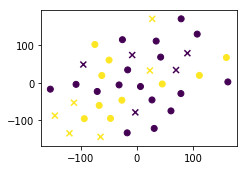

In [36]:
% matplotlib inline
import matplotlib.pyplot as plt
cm = plt.cm.get_cmap('RdYlBu')
# co = pred.cpu().detach().numpy()
# plt.scatter(act_embedded[:,0], act_embedded[:,1], c=co, marker = markers)
# ax.set_xlim([-200,200])
# ax.set_ylim([-200,200])
# plt.show()
correct = np.where(pred.cpu().detach().numpy() == d.cpu().detach().numpy())
wrong = np.where(pred.cpu().detach().numpy() != d.cpu().detach().numpy())
act_correct = act_embedded[correct]
act_wrong = act_embedded[wrong]
f, ax = plt.subplots(figsize = (3.5,2.5))
plt.scatter(act_correct[:,0], act_correct[:,1], marker='o', c=pred.cpu().detach().numpy()[correct])
plt.scatter(act_wrong[:,0], act_wrong[:,1], marker='x', c=pred.cpu().detach().numpy()[wrong])



In [34]:
co = pred.cpu().detach().numpy()[correct]
co

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [40]:
with open('iclr2017_test.txt', 'w') as f:
    for i in range(len(x_test[1])):
        f.write(x_test[1][i].__dict__['TITLE']+'\t'+(str(pred[i].item())+','+str(d[i].item())))
        f.write('\n')

In [125]:
checkpoint = {'model_state_dict': model.state_dict(),
                'optimizer_state_dict':optimizer.state_dict(),
                'batch_size': 32}
params = {
             'optimizer': 'Adam',
             'Type': 'Review+Sentiment',
             'Filter_size': '64 on review',
             'Dropout': 0.7,
             'iteration': str(int(time.time()))
}

In [126]:
with open('./trained_task2/rs/' + params['iteration'] + '.model', 'wb') as f:
                        torch.save(checkpoint, f)
with open('./trained_task2/rs/' + params['iteration'] + '.json', 'w') as f:
        json.dump(params, f)